In [ ]:
#Uso de librer√≠as. Celda n¬∫1
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings
from collections import defaultdict
from tabulate import tabulate
from google.colab import data_table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Cargar el archivo Excel
xls = pd.ExcelFile("Test_animales.xlsx")
# Leer las hojas y asignar la nueva variable "degenera"
df_list = []
for i, sheet in enumerate(xls.sheet_names):
    df = xls.parse(sheet)
    df["degenera"] = i  # Asigna 0 a la primera hoja, 1 a la segunda, etc.
    df_list.append(df)

# Unir todas las hojas en un solo DataFrame
df = pd.concat(df_list, ignore_index=True)
# Guardar el resultado en un CSV
df.to_csv("Test_animales.csv", index=False)


data = pd.read_csv("Test_animales.csv", header =2)
# Asignar la primera fila como nombres de columnas
data.columns = data.iloc[0]  # Toma la primera fila como encabezados
data = data[1:].reset_index(drop=True)  # Eliminar la fila duplicada y resetear √≠ndice

# Asegurar que no hay nombres de columna repetidos
data.columns = [str(col) for col in data.columns]
display(data)

Edad sacrificio ID animal Sexo       P30   3m   4m   6m   9m  12m 17-21m  \
0                 1     WT-25    ‚ôÄ  110220-5  NaN  NaN  NaN  NaN  NaN    NaN   
1                 1    WT-110    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
2                 1    WT-111    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
3                 1    WT-112    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
4                 1    WT-113    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
..              ...       ...  ...       ...  ...  ...  ...  ...  ...    ...   
254             P11       R10  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
255             P11       R11  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
256             P11       R12  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
257             P11       R13  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   
258             P11       R14  NaN       NaN  NaN  NaN  NaN  NaN  NaN    NaN   

     ...    OI     OD     OI          F.Optomotor Edad Opto Dato OPT  \
0    ...  19.5  146.7  166.1  2020-02-17 00:00:00      1,3m    0.572   
1    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
2    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
3    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
4    ...   NaN    NaN    NaN                  NaN       NaN      NaN   
..   ...   ...    ...    ...                  ...       ...      ...   
254  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
255  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
256  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
257  ...   NaN    NaN    NaN                  NaN       NaN      NaN   
258  ...   NaN    NaN    NaN                  NaN       NaN      NaN   

                   F.OCT OD (400 um)       OI  0  
0    2020-02-17 00:00:00      52.818  202.818  0  
1                    NaN         NaN      NaN  0  
2                    NaN         NaN      NaN  0  
3                    NaN         NaN      NaN  0  
4                    NaN         NaN      NaN  0  
..                   ...         ...      ... ..  
254                  NaN         NaN      NaN  1  
255                  NaN         NaN      NaN  1  
256                  NaN         NaN      NaN  1  
257                  NaN         NaN      NaN  1  
258                  NaN         NaN      NaN  1  

[259 rows x 25 columns]

In [ ]:
# Contador para cada nombre de columna duplicada
oi_counter = 1
od_counter = 1
new_columns = []

# Renombrar correctamente las columnas duplicadas de OI y OD
for col in data.columns:
    if col.startswith("OI"):
        new_columns.append(f"OI_{oi_counter}")
        oi_counter += 1
    elif col.startswith("OD"):
        new_columns.append(f"OD_{od_counter}")
        od_counter += 1
    elif col.startswith("0"):
        new_columns.append("degenera")
    else:
        new_columns.append(col) # Mantener los dem√°s nombres iguales
# Aplicar los nuevos nombres
data.columns = new_columns
# Mostrar el resultado
print(data.columns)


Index(['Edad sacrificio', 'ID animal', 'Sexo', 'P30', '3m', '4m', '6m', '9m',
       '12m', '17-21m', 'OD_1', 'OI_1', 'OD_2', 'OI_2', 'OD_3', 'OI_3', 'OD_4',
       'OI_4', 'F.Optomotor', 'Edad Opto', 'Dato OPT', 'F.OCT', 'OD_5', 'OI_5',
       'degenera'],
      dtype='object')


In [ ]:
# Contar las instancias de cada valor en "degenera"
conteo = data["degenera"].value_counts()
print(conteo)

degenera
0    131
1    128
Name: count, dtype: int64


In [ ]:
# Contar valores NaN en cada columna
nan_counts = data.isna().sum()
print(tabulate(nan_counts.reset_index(), headers=["Variable", "Cantidad de NaN"], tablefmt="pretty"))

+----+-----------------+-----------------+
|    |    Variable     | Cantidad de NaN |
+----+-----------------+-----------------+
| 0  | Edad sacrificio |        4        |
| 1  |    ID animal    |        1        |
| 2  |      Sexo       |       15        |
| 3  |       P30       |       246       |
| 4  |       3m        |       236       |
| 5  |       4m        |       252       |
| 6  |       6m        |       243       |
| 7  |       9m        |       243       |
| 8  |       12m       |       239       |
| 9  |     17-21m      |       241       |
| 10 |      OD_1       |       180       |
| 11 |      OI_1       |       184       |
| 12 |      OD_2       |       181       |
| 13 |      OI_2       |       184       |
| 14 |      OD_3       |       180       |
| 15 |      OI_3       |       184       |
| 16 |      OD_4       |       181       |
| 17 |      OI_4       |       184       |
| 18 |   F.Optomotor   |       160       |
| 19 |    Edad Opto    |       154       |
| 20 |    D

In [ ]:
# Seleccionar columnas que empiezan con "OI", "OD" o "Dato OPT"
oi_od_columns = [col for col in data.columns if col.startswith("OI") or col.startswith("OD") or col.startswith("Dato OPT")]
# Eliminar filas donde TODAS esas columnas sean NaN (si al menos una tiene valor, la fila se queda)
data = data.dropna(subset=oi_od_columns, how="all").reset_index(drop=True)
display(data)

Edad sacrificio ID animal Sexo       P30   3m   4m   6m   9m  12m  \
0                 1     WT-25    ‚ôÄ  110220-5  NaN  NaN  NaN  NaN  NaN   
1               1.3     WT-23    ‚ôÄ  110220-3  NaN  NaN  NaN  NaN  NaN   
2               1.3     WT-24    ‚ôÄ  110220-4  NaN  NaN  NaN  NaN  NaN   
3               1.3     WT-26    ‚ôÇ  110220-1  NaN  NaN  NaN  NaN  NaN   
4               1.3     WT-27    ‚ôÇ  110220-2  NaN  NaN  NaN  NaN  NaN   
..              ...       ...  ...       ...  ...  ...  ...  ...  ...   
102              19     12120    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN   
103              20     12004    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN   
104              20     12045    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN   
105              20     12046    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN   
106              20     12057    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN   

       17-21m  ...  OI_3   OD_4   OI_4          F.Optomotor Edad Opto  \
0         NaN  ...  19.5  146.7  166.1  2020-02-17 00:00:00      1,3m   
1         NaN  ...  19.9  123.1  135.2  2020-02-17 00:00:00      1,3m   
2         NaN  ...  19.3  184.3  183.7  2020-02-17 00:00:00      1,3m   
3         NaN  ...  18.0  131.8  166.9  2020-02-17 00:00:00      1,3m   
4         NaN  ...  16.5  181.2  142.6  2020-02-17 00:00:00      1,3m   
..        ...  ...   ...    ...    ...                  ...       ...   
102  110521-5  ...     3     52   84,8                  NaN       NaN   
103  190521-2  ...   3,2   63,1   57,1                  NaN       NaN   
104  190521-7  ...     4   93,2     85                  NaN       NaN   
105  190521-6  ...     7   52,5   91,7                  NaN       NaN   
106  190521-9  ...     4     9*   87,6                  NaN       NaN   

    Dato OPT                F.OCT    OD_5     OI_5 degenera  
0      0.572  2020-02-17 00:00:00  52.818  202.818        0  
1      0.574  2020-02-17 00:00:00  47.365  202.364        0  
2      0.594  2020-02-17 00:00:00   54.94  209.455        0  
3      0.550  2020-02-17 00:00:00  57.273  212.909        0  
4      0.616  2020-02-17 00:00:00  51.091  202.545        0  
..       ...                  ...     ...      ...      ...  
102    0,308  2021-04-28 00:00:00     NaN      NaN        1  
103    0,297  2021-04-26 00:00:00     NaN      NaN        1  
104    0,319  2021-04-27 00:00:00     NaN      NaN        1  
105    0,308  2021-04-27 00:00:00     NaN      NaN        1  
106    0,286  2021-04-28 00:00:00     NaN      NaN        1  

[107 rows x 25 columns]

In [ ]:
data.drop('Edad sacrificio',axis =1, inplace =True)
data.drop('F.Optomotor',axis =1, inplace =True)
data.drop('F.OCT',axis =1, inplace =True)
data.drop('ID animal',axis =1, inplace =True)
display(data)

Sexo       P30   3m   4m   6m   9m  12m    17-21m   OD_1   OI_1  ...  \
0      ‚ôÄ  110220-5  NaN  NaN  NaN  NaN  NaN       NaN  224.1  262.1  ...   
1      ‚ôÄ  110220-3  NaN  NaN  NaN  NaN  NaN       NaN  147.6  217.6  ...   
2      ‚ôÄ  110220-4  NaN  NaN  NaN  NaN  NaN       NaN  318.8  291.6  ...   
3      ‚ôÇ  110220-1  NaN  NaN  NaN  NaN  NaN       NaN  206.7  197.6  ...   
4      ‚ôÇ  110220-2  NaN  NaN  NaN  NaN  NaN       NaN  292.1  198.6  ...   
..   ...       ...  ...  ...  ...  ...  ...       ...    ...    ...  ...   
102    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN  110521-5   78,1   72,1  ...   
103    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN  190521-2   65,1   60,8  ...   
104    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN  190521-7   92,2   83,8  ...   
105    ‚ôÇ       NaN  NaN  NaN  NaN  NaN  NaN  190521-6     79  113,1  ...   
106    ‚ôÄ       NaN  NaN  NaN  NaN  NaN  NaN  190521-9     6*   81,9  ...   

      OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto Dato OPT    OD_5     OI_5  \
0    628.0  16.8  19.5  146.7  166.1      1,3m    0.572  52.818  202.818   
1    501.6  21.6  19.9  123.1  135.2      1,3m    0.574  47.365  202.364   
2    630.5  14.2  19.3  184.3  183.7      1,3m    0.594   54.94  209.455   
3    492.3  14.3  18.0  131.8  166.9      1,3m    0.550  57.273  212.909   
4    470.4  17.5  16.5  181.2  142.6      1,3m    0.616  51.091  202.545   
..     ...   ...   ...    ...    ...       ...      ...     ...      ...   
102  181,2     2     3     52   84,8       NaN    0,308     NaN      NaN   
103  188,7     5   3,2   63,1   57,1       NaN    0,297     NaN      NaN   
104  246,8     3     4   93,2     85       NaN    0,319     NaN      NaN   
105  249,4     5     7   52,5   91,7       NaN    0,308     NaN      NaN   
106  241,3    2*     4     9*   87,6       NaN    0,286     NaN      NaN   

    degenera  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
102        1  
103        1  
104        1  
105        1  
106        1  

[107 rows x 21 columns]

In [ ]:
data["Sexo"] = data["Sexo"].map({"‚ôÄ": 0, "‚ôÇ": 1})
data["Sexo"] = data["Sexo"].fillna(-1).astype(int)
print(data["Sexo"].value_counts())
display(data)

Sexo
 1    56
 0    44
-1     7
Name: count, dtype: int64


Sexo       P30   3m   4m   6m   9m  12m    17-21m   OD_1   OI_1  ...  \
0       0  110220-5  NaN  NaN  NaN  NaN  NaN       NaN  224.1  262.1  ...   
1       0  110220-3  NaN  NaN  NaN  NaN  NaN       NaN  147.6  217.6  ...   
2       0  110220-4  NaN  NaN  NaN  NaN  NaN       NaN  318.8  291.6  ...   
3       1  110220-1  NaN  NaN  NaN  NaN  NaN       NaN  206.7  197.6  ...   
4       1  110220-2  NaN  NaN  NaN  NaN  NaN       NaN  292.1  198.6  ...   
..    ...       ...  ...  ...  ...  ...  ...       ...    ...    ...  ...   
102     0       NaN  NaN  NaN  NaN  NaN  NaN  110521-5   78,1   72,1  ...   
103     0       NaN  NaN  NaN  NaN  NaN  NaN  190521-2   65,1   60,8  ...   
104     1       NaN  NaN  NaN  NaN  NaN  NaN  190521-7   92,2   83,8  ...   
105     1       NaN  NaN  NaN  NaN  NaN  NaN  190521-6     79  113,1  ...   
106     0       NaN  NaN  NaN  NaN  NaN  NaN  190521-9     6*   81,9  ...   

      OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto Dato OPT    OD_5     OI_5  \
0    628.0  16.8  19.5  146.7  166.1      1,3m    0.572  52.818  202.818   
1    501.6  21.6  19.9  123.1  135.2      1,3m    0.574  47.365  202.364   
2    630.5  14.2  19.3  184.3  183.7      1,3m    0.594   54.94  209.455   
3    492.3  14.3  18.0  131.8  166.9      1,3m    0.550  57.273  212.909   
4    470.4  17.5  16.5  181.2  142.6      1,3m    0.616  51.091  202.545   
..     ...   ...   ...    ...    ...       ...      ...     ...      ...   
102  181,2     2     3     52   84,8       NaN    0,308     NaN      NaN   
103  188,7     5   3,2   63,1   57,1       NaN    0,297     NaN      NaN   
104  246,8     3     4   93,2     85       NaN    0,319     NaN      NaN   
105  249,4     5     7   52,5   91,7       NaN    0,308     NaN      NaN   
106  241,3    2*     4     9*   87,6       NaN    0,286     NaN      NaN   

    degenera  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
102        1  
103        1  
104        1  
105        1  
106        1  

[107 rows x 21 columns]

In [ ]:
data["Edad_ERG"] = np.nan
edad_map = {
    "P30": 1,
    "3m": 3,
    "4m": 4,
    "6m": 6,
    "9m": 9,
    "12m": 12,
    "17-21m": 19
}

for col, val in edad_map.items():
    data.loc[data[col].notna(), "Edad_ERG"] = val

# Normalizar con Min-Max Scaling
min_val = min(edad_map.values())  # M√≠nimo (1)
max_val = max(edad_map.values())  # M√°ximo (19)
data["Edad_ERG"] = (data["Edad_ERG"] - min_val) / (max_val - min_val)
# Crear diccionario con valores normalizados
edad_normalizada = {
    nombre: round((valor - min_val) / (max_val - min_val), 3)
    for nombre, valor in edad_map.items()
}

# Mostrar
for nombre, valor_norm in edad_normalizada.items():
    print(f"{nombre}: {valor_norm}")

display(data[["P30", "3m", "4m", "6m", "9m", "12m", "17-21m", "Edad_ERG"]])

P30: 0.0
3m: 0.111
4m: 0.167
6m: 0.278
9m: 0.444
12m: 0.611
17-21m: 1.0


P30   3m   4m   6m   9m  12m    17-21m  Edad_ERG
0    110220-5  NaN  NaN  NaN  NaN  NaN       NaN       0.0
1    110220-3  NaN  NaN  NaN  NaN  NaN       NaN       0.0
2    110220-4  NaN  NaN  NaN  NaN  NaN       NaN       0.0
3    110220-1  NaN  NaN  NaN  NaN  NaN       NaN       0.0
4    110220-2  NaN  NaN  NaN  NaN  NaN       NaN       0.0
..        ...  ...  ...  ...  ...  ...       ...       ...
102       NaN  NaN  NaN  NaN  NaN  NaN  110521-5       1.0
103       NaN  NaN  NaN  NaN  NaN  NaN  190521-2       1.0
104       NaN  NaN  NaN  NaN  NaN  NaN  190521-7       1.0
105       NaN  NaN  NaN  NaN  NaN  NaN  190521-6       1.0
106       NaN  NaN  NaN  NaN  NaN  NaN  190521-9       1.0

[107 rows x 8 columns]

In [ ]:
data = data.drop(columns=["P30", "3m", "4m", "6m", "9m", "12m", "17-21m"])
display(data)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1      1,3m   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2      1,3m   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7      1,3m   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9      1,3m   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6      1,3m   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
102     0   78,1   72,1  174,8  181,2     2     3     52   84,8       NaN   
103     0   65,1   60,8  199,9  188,7     5   3,2   63,1   57,1       NaN   
104     1   92,2   83,8  264,3  246,8     3     4   93,2     85       NaN   
105     1     79  113,1  191,6  249,4     5     7   52,5   91,7       NaN   
106     0     6*   81,9    37*  241,3    2*     4     9*   87,6       NaN   

    Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0      0.572  52.818  202.818         0       0.0  
1      0.574  47.365  202.364         0       0.0  
2      0.594   54.94  209.455         0       0.0  
3      0.550  57.273  212.909         0       0.0  
4      0.616  51.091  202.545         0       0.0  
..       ...     ...      ...       ...       ...  
102    0,308     NaN      NaN         1       1.0  
103    0,297     NaN      NaN         1       1.0  
104    0,319     NaN      NaN         1       1.0  
105    0,308     NaN      NaN         1       1.0  
106    0,286     NaN      NaN         1       1.0  

[107 rows x 15 columns]

In [ ]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
display(data)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1      1,3m   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2      1,3m   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7      1,3m   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9      1,3m   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6      1,3m   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
102     0   78,1   72,1  174,8  181,2     2     3     52   84,8       NaN   
103     0   65,1   60,8  199,9  188,7     5   3,2   63,1   57,1       NaN   
104     1   92,2   83,8  264,3  246,8     3     4   93,2     85       NaN   
105     1     79  113,1  191,6  249,4     5     7   52,5   91,7       NaN   
106     0     6*   81,9    37*  241,3    2*     4     9*   87,6       NaN   

    Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0      0.572  52.818  202.818         0       0.0  
1      0.574  47.365  202.364         0       0.0  
2      0.594   54.94  209.455         0       0.0  
3      0.550  57.273  212.909         0       0.0  
4      0.616  51.091  202.545         0       0.0  
..       ...     ...      ...       ...       ...  
102    0,308     NaN      NaN         1       1.0  
103    0,297     NaN      NaN         1       1.0  
104    0,319     NaN      NaN         1       1.0  
105    0,308     NaN      NaN         1       1.0  
106    0,286     NaN      NaN         1       1.0  

[107 rows x 15 columns]

In [ ]:
data = data.drop(index=[47,48, 49])
data = data.reset_index(drop=True)
data = data.replace({'\*': ''}, regex=True)
display(data)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4 Edad Opto  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1      1,3m   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2      1,3m   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7      1,3m   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9      1,3m   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6      1,3m   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
99      0   78,1   72,1  174,8  181,2     2     3     52   84,8       NaN   
100     0   65,1   60,8  199,9  188,7     5   3,2   63,1   57,1       NaN   
101     1   92,2   83,8  264,3  246,8     3     4   93,2     85       NaN   
102     1     79  113,1  191,6  249,4     5     7   52,5   91,7       NaN   
103     0      6   81,9     37  241,3     2     4      9   87,6       NaN   

    Dato OPT    OD_5     OI_5  degenera  Edad_ERG  
0      0.572  52.818  202.818         0       0.0  
1      0.574  47.365  202.364         0       0.0  
2      0.594   54.94  209.455         0       0.0  
3      0.550  57.273  212.909         0       0.0  
4      0.616  51.091  202.545         0       0.0  
..       ...     ...      ...       ...       ...  
99     0,308     NaN      NaN         1       1.0  
100    0,297     NaN      NaN         1       1.0  
101    0,319     NaN      NaN         1       1.0  
102    0,308     NaN      NaN         1       1.0  
103    0,286     NaN      NaN         1       1.0  

[104 rows x 15 columns]

In [ ]:
# Contar las instancias de cada valor en "degenera"
conteo = data["degenera"].value_counts()
print(conteo)

degenera
1    57
0    47
Name: count, dtype: int64


In [ ]:
# Crear el segundo conjunto de datos eliminando variables innecesarias
data_modelo2 = data.drop(columns=["Edad Opto", "Dato OPT", "OD_5", "OI_5"])
display(data_modelo2)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4  degenera  \
0       0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1         0   
1       0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2         0   
2       0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7         0   
3       1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9         0   
4       1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6         0   
..    ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
99      0   78,1   72,1  174,8  181,2     2     3     52   84,8         1   
100     0   65,1   60,8  199,9  188,7     5   3,2   63,1   57,1         1   
101     1   92,2   83,8  264,3  246,8     3     4   93,2     85         1   
102     1     79  113,1  191,6  249,4     5     7   52,5   91,7         1   
103     0      6   81,9     37  241,3     2     4      9   87,6         1   

     Edad_ERG  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
..        ...  
99        1.0  
100       1.0  
101       1.0  
102       1.0  
103       1.0  

[104 rows x 11 columns]

In [ ]:
import numpy as np

# Lista de columnas a verificar
columnas_verificar = ["OD_1", "OI_1", "OD_2", "OI_2", "OD_3", "OI_3", "OD_4", "OI_4"]
data_modelo2.replace({',': '.'}, regex=True, inplace=True)
# Reemplazar "-" y "?" por NaN
data_modelo2.replace({"-": np.nan, "?": np.nan}, inplace=True)
# Eliminar filas donde TODAS estas columnas sean NaN
data_modelo2 = data_modelo2.dropna(subset=columnas_verificar, how='all')
data_modelo2.reset_index(drop=True, inplace=True)
display(data_modelo2)

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4  degenera  \
0      0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1         0   
1      0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2         0   
2      0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7         0   
3      1  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9         0   
4      1  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6         0   
..   ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
69     0   78.1   72.1  174.8  181.2     2     3     52   84.8         1   
70     0   65.1   60.8  199.9  188.7     5   3.2   63.1   57.1         1   
71     1   92.2   83.8  264.3  246.8     3     4   93.2     85         1   
72     1     79  113.1  191.6  249.4     5     7   52.5   91.7         1   
73     0      6   81.9     37  241.3     2     4      9   87.6         1   

    Edad_ERG  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
69       1.0  
70       1.0  
71       1.0  
72       1.0  
73       1.0  

[74 rows x 11 columns]

In [ ]:
# Reemplazar valores no num√©ricos y convertir a int
#data_modelo2 = data_modelo2.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
data_modelo2 = data_modelo2.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
# Verificar que todo es int
print(data_modelo2.dtypes)

Sexo        float64
OD_1        float64
OI_1        float64
OD_2        float64
OI_2        float64
OD_3        float64
OI_3        float64
OD_4        float64
OI_4        float64
degenera    float64
Edad_ERG    float64
dtype: object


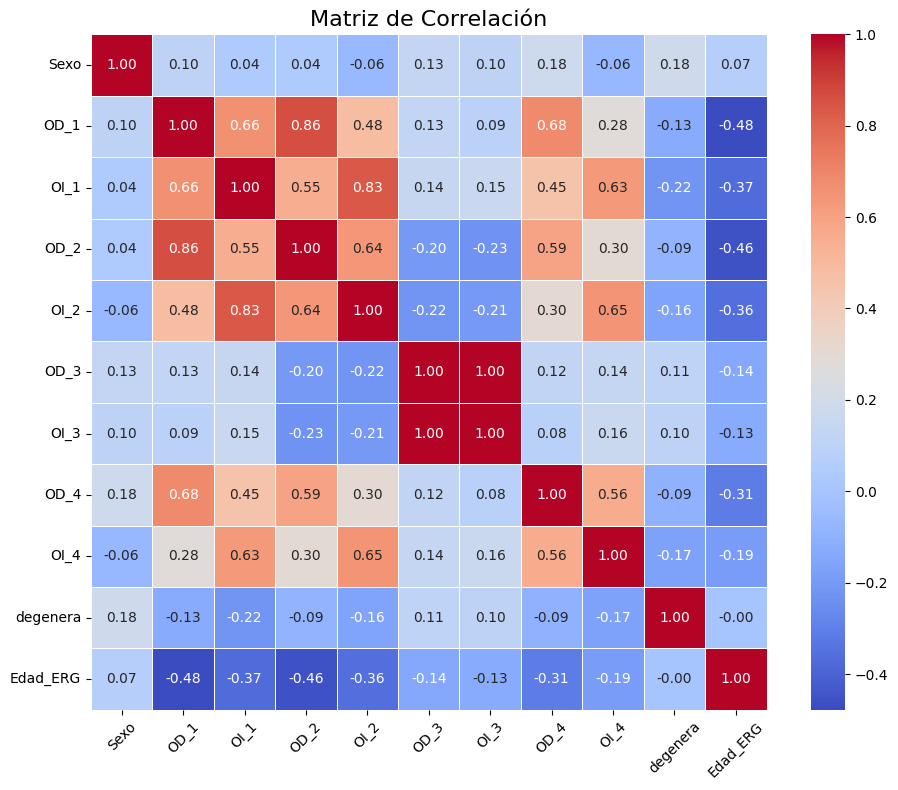

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama data_modelo2
# Si no lo has cargado a√∫n: data_modelo2 = pd.read_csv('tu_archivo.csv')

# Calcular matriz de correlaci√≥n
correlation_matrix = data_modelo2.corr(numeric_only=True)

# Mostrar la matriz de correlaci√≥n con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlaci√≥n", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE (solo para problemas de clasificaci√≥n desbalanceada)
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)

# Mostrar ejemplos de datos aumentados
print("Datos aumentados con ruido:")
print(X_train_augmented_noise[:5])

print("Datos aumentados con escalado:")
print(X_train_augmented_scaled[:5])

print("Datos aumentados con SMOTE:")
print(X_train_augmented_smote[:5])

print("Datos aumentados con Bootstrap:")
print(X_train_augmented_bootstrap[:5])

# Aqu√≠ es donde usar√≠as los datos aumentados en el entrenamiento de tu modelo, por ejemplo:
# Si eliges usar SMOTE:
# X_train_augmented = X_train_augmented_smote
# y_train_augmented = y_train_augmented_smote

# Si eliges usar ruido o escalado, puedes combinar los m√©todos de la siguiente manera:
# X_train_augmented = X_train_augmented_noise  # O cualquier otro m√©todo
# y_train_augmented = y_train  # Etiquetas originales


display (data_modelo2)

Datos aumentados con ruido:
[[ 0.61513455  1.25113391  1.01761179  0.69756279  0.51790465 -0.00321537
  -0.0094977   1.41864823  1.10364679  0.58673761]
 [ 0.85383062 -0.19041717  0.39923024  0.00648541 -0.01285114 -0.16366548
  -0.1546573   0.66254036  0.72068281  0.17145264]
 [ 0.77357597  0.22475416  0.3467325  -1.93691174 -1.81214943  0.22750374
   0.07103551  0.72810508 -2.05415127 -0.82757062]
 [ 0.83950279 -1.72991122 -1.29220807 -0.76656468 -0.43907972 -0.35147847
  -0.38761788 -1.95555675 -2.00432822 -0.19318578]
 [-1.14164797  0.23026479  0.31888952  0.61003592  0.4974381  -0.00605
  -0.10536189 -0.04659466  0.7351437  -0.99860345]]
Datos aumentados con escalado:
[[ 0.88410439  1.22262081  1.0311148   0.80267717  0.41056701  0.00369106
  -0.04396519  1.53256965  1.41679701  0.65697747]
 [ 0.88410439 -0.20390226  0.30108552  0.07136385  0.20729558 -0.07647799
  -0.10395589  0.68153089  0.74106865  0.19369057]
 [ 0.88410439  0.22372058  0.354621   -2.13134364 -2.17191656  0.107

Sexo   OD_1   OI_1   OD_2   OI_2  OD_3  OI_3   OD_4   OI_4  degenera  \
0    0.0  224.1  262.1  540.4  628.0  16.8  19.5  146.7  166.1       0.0   
1    0.0  147.6  217.6  320.6  501.6  21.6  19.9  123.1  135.2       0.0   
2    0.0  318.8  291.6  719.6  630.5  14.2  19.3  184.3  183.7       0.0   
3    1.0  206.7  197.6  527.3  492.3  14.3  18.0  131.8  166.9       0.0   
4    1.0  292.1  198.6  696.6  470.4  17.5  16.5  181.2  142.6       0.0   
..   ...    ...    ...    ...    ...   ...   ...    ...    ...       ...   
69   0.0   78.1   72.1  174.8  181.2   2.0   3.0   52.0   84.8       1.0   
70   0.0   65.1   60.8  199.9  188.7   5.0   3.2   63.1   57.1       1.0   
71   1.0   92.2   83.8  264.3  246.8   3.0   4.0   93.2   85.0       1.0   
72   1.0   79.0  113.1  191.6  249.4   5.0   7.0   52.5   91.7       1.0   
73   0.0    6.0   81.9   37.0  241.3   2.0   4.0    9.0   87.6       1.0   

    Edad_ERG  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
69       1.0  
70       1.0  
71       1.0  
72       1.0  
73       1.0  

[74 rows x 11 columns]

Modelo: Random Forest
Accuracy: 0.5333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15

Matriz de Confusi√≥n para Random Forest:
 [[6 4]
 [3 2]]


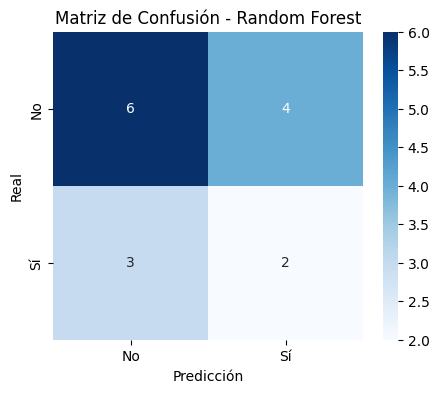

In [ ]:
# Importar librer√≠as necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluaci√≥n de Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Modelo: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Matriz de Confusi√≥n para Random Forest:\n", cm_rf)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.show()

Evaluaci√≥n con datos aumentados por ruido aleatorio:
üîπ Accuracy en entrenamiento: 0.9661
üîπ Accuracy en test: 0.5333

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.64      0.70      0.67        10
         1.0       0.25      0.20      0.22         5

    accuracy                           0.53        15
   macro avg       0.44      0.45      0.44        15
weighted avg       0.51      0.53      0.52        15



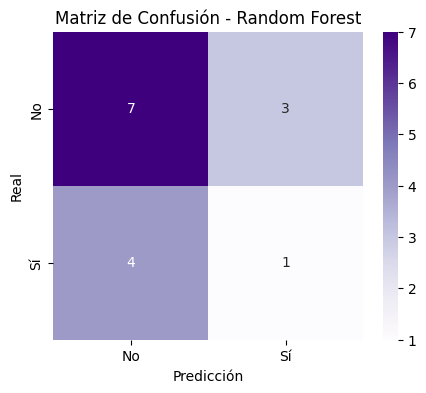

Evaluaci√≥n con datos aumentados por escalado:
üîπ Accuracy en entrenamiento: 0.9831
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



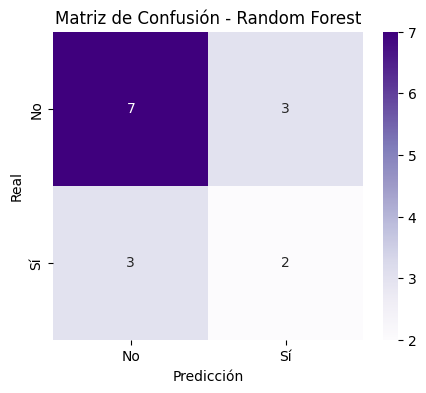

Evaluaci√≥n con datos aumentados por SMOTE:
üîπ Accuracy en entrenamiento: 0.9531
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



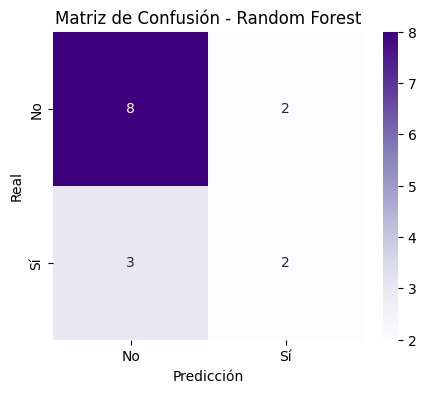

Evaluaci√≥n con datos aumentados por Bootstrap:
üîπ Accuracy en entrenamiento: 0.9831
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.50      0.60      0.55         5

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15



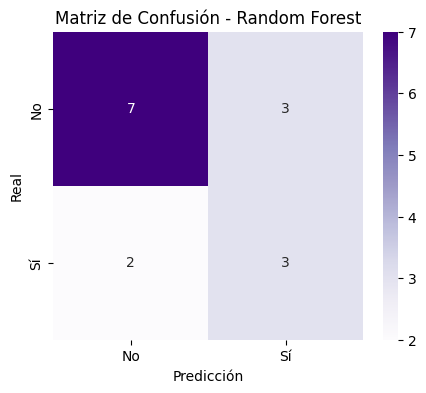

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Funci√≥n para entrenar y evaluar el modelo
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Crear el modelo RandomForest con los hiperpar√°metros dados
    rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)

    # Entrenar el modelo
    rf.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    # Calcular accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Matriz de confusi√≥n
    matriz_conf = confusion_matrix(y_test, y_pred_test)

    # Mostrar resultados
    print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"üîπ Accuracy en test: {acc_test:.4f}")

    # Reporte de clasificaci√≥n
    print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - Random Forest")
    plt.show()

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise
print("Evaluaci√≥n con datos aumentados por ruido aleatorio:")
train_and_evaluate(X_train_augmented_noise, X_test_scaled, y_train, y_test)

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors
print("Evaluaci√≥n con datos aumentados por escalado:")
train_and_evaluate(X_train_augmented_scaled, X_test_scaled, y_train, y_test)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)
print("Evaluaci√≥n con datos aumentados por SMOTE:")
train_and_evaluate(X_train_augmented_smote, X_test_scaled, y_train_augmented_smote, y_test)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)
print("Evaluaci√≥n con datos aumentados por Bootstrap:")
train_and_evaluate(X_train_augmented_bootstrap, X_test_scaled, y_train_augmented_bootstrap, y_test)


Modelo: SVM
Accuracy: 0.5333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15

Matriz de Confusi√≥n para SVM:
 [[6 4]
 [3 2]]


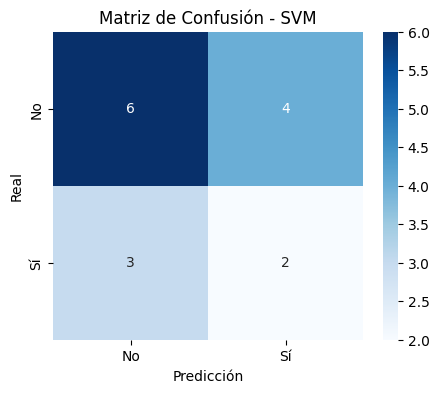

In [ ]:
# Importar librer√≠as necesarias
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Escalar las caracter√≠sticas para el modelo SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Evaluaci√≥n de SVM
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Modelo: SVM")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Matriz de Confusi√≥n para SVM:\n", cm_svm)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - SVM")
plt.show()


Evaluaci√≥n con datos aumentados por ruido aleatorio:
üîπ Accuracy en entrenamiento: 0.8136
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



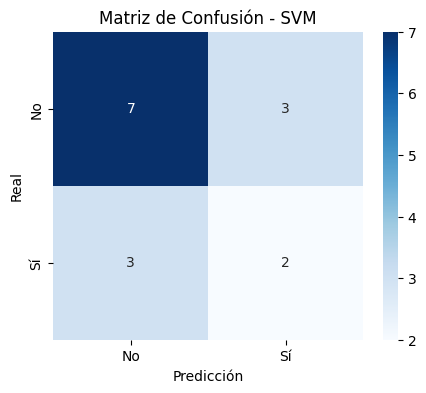

Evaluaci√≥n con datos aumentados por escalado:
üîπ Accuracy en entrenamiento: 0.8136
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



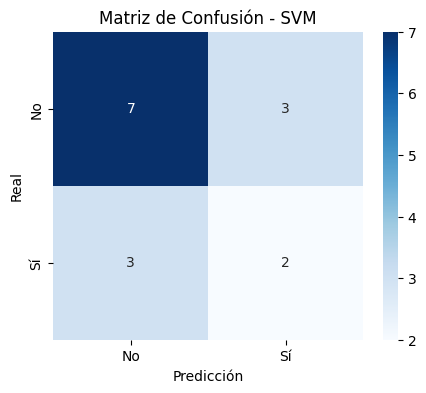

Evaluaci√≥n con datos aumentados por SMOTE:
üîπ Accuracy en entrenamiento: 0.8281
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



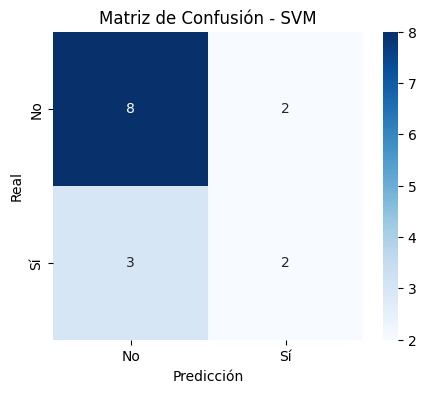

Evaluaci√≥n con datos aumentados por Bootstrap:
üîπ Accuracy en entrenamiento: 0.8136
üîπ Accuracy en test: 0.7333

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15



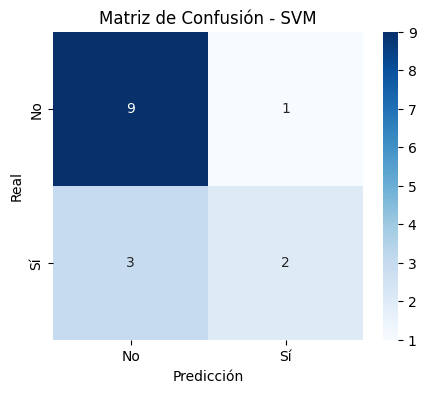

In [ ]:
# Importar librer√≠as necesarias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Funci√≥n para entrenar y evaluar el modelo SVM
def train_and_evaluate_svm(X_train, X_test, y_train, y_test):
    # Crear el modelo SVM con un kernel RBF
    svm = SVC(kernel='rbf', probability=True, random_state=42)

    # Entrenar el modelo
    svm.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)

    # Calcular accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Matriz de confusi√≥n
    matriz_conf = confusion_matrix(y_test, y_pred_test)

    # Mostrar resultados
    print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"üîπ Accuracy en test: {acc_test:.4f}")

    # Reporte de clasificaci√≥n
    print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - SVM")
    plt.show()

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise
print("Evaluaci√≥n con datos aumentados por ruido aleatorio:")
train_and_evaluate_svm(X_train_augmented_noise, X_test_scaled, y_train, y_test)

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors
print("Evaluaci√≥n con datos aumentados por escalado:")
train_and_evaluate_svm(X_train_augmented_scaled, X_test_scaled, y_train, y_test)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)
print("Evaluaci√≥n con datos aumentados por SMOTE:")
train_and_evaluate_svm(X_train_augmented_smote, X_test_scaled, y_train_augmented_smote, y_test)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)
print("Evaluaci√≥n con datos aumentados por Bootstrap:")
train_and_evaluate_svm(X_train_augmented_bootstrap, X_test_scaled, y_train_augmented_bootstrap, y_test)


Holaaaa


Modelo: XGBoost
Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.50      0.60      0.55         5

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15

Matriz de Confusi√≥n para XGBoost:
 [[7 3]
 [2 3]]


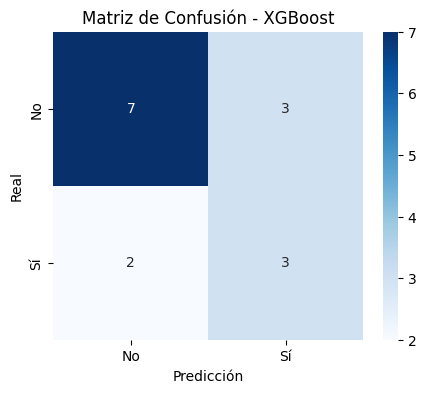

In [ ]:
# Importar librer√≠as necesarias
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Evaluaci√≥n de XGBoost
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Modelo: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Matriz de Confusi√≥n para XGBoost:\n", cm_xgb)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - XGBoost")
plt.show()


Evaluaci√≥n con datos aumentados por ruido aleatorio:
üîπ Accuracy en entrenamiento: 1.0000
üîπ Accuracy en test: 0.2667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.40      0.20      0.27        10
         1.0       0.20      0.40      0.27         5

    accuracy                           0.27        15
   macro avg       0.30      0.30      0.27        15
weighted avg       0.33      0.27      0.27        15



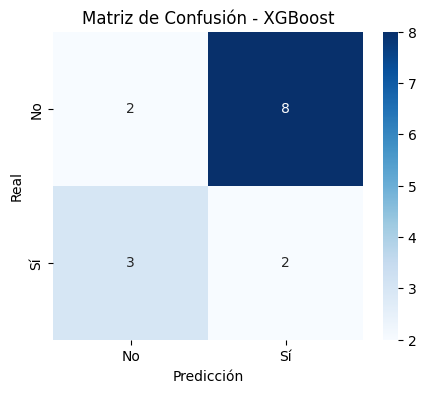

Evaluaci√≥n con datos aumentados por escalado:
üîπ Accuracy en entrenamiento: 1.0000
üîπ Accuracy en test: 0.7333

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78        10
         1.0       0.57      0.80      0.67         5

    accuracy                           0.73        15
   macro avg       0.72      0.75      0.72        15
weighted avg       0.77      0.73      0.74        15



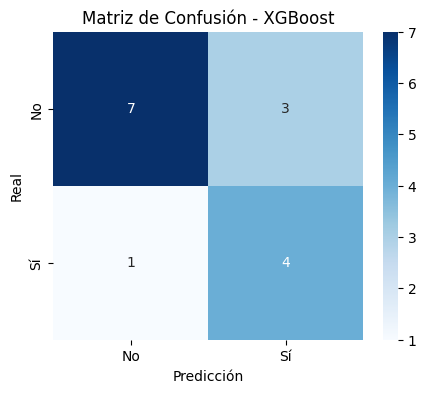

Evaluaci√≥n con datos aumentados por SMOTE:
üîπ Accuracy en entrenamiento: 1.0000
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        10
         1.0       0.43      0.60      0.50         5

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15



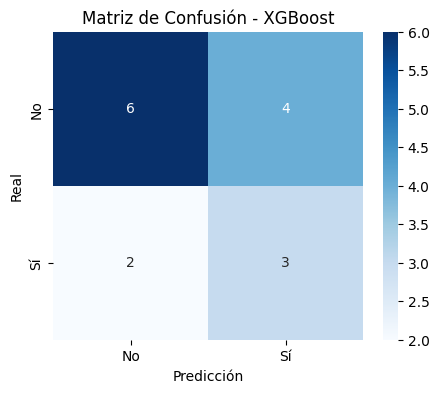

Evaluaci√≥n con datos aumentados por Bootstrap:
üîπ Accuracy en entrenamiento: 1.0000
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



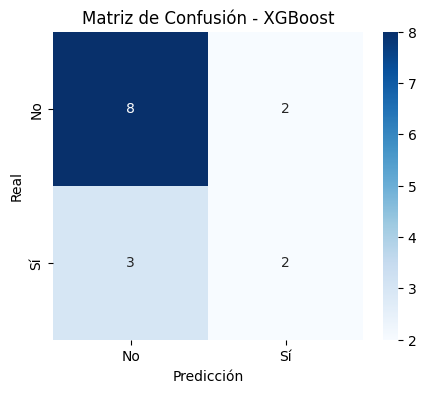

In [ ]:
# Importar librer√≠as necesarias
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Funci√≥n para entrenar y evaluar el modelo
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Crear el modelo XGBoost con los hiperpar√°metros dados
    xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

    # Entrenar el modelo
    xgb.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)

    # Calcular accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Matriz de confusi√≥n
    matriz_conf = confusion_matrix(y_test, y_pred_test)

    # Mostrar resultados
    print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"üîπ Accuracy en test: {acc_test:.4f}")

    # Reporte de clasificaci√≥n
    print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - XGBoost")
    plt.show()

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise
print("Evaluaci√≥n con datos aumentados por ruido aleatorio:")
train_and_evaluate(X_train_augmented_noise, X_test_scaled, y_train, y_test)

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors
print("Evaluaci√≥n con datos aumentados por escalado:")
train_and_evaluate(X_train_augmented_scaled, X_test_scaled, y_train, y_test)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)
print("Evaluaci√≥n con datos aumentados por SMOTE:")
train_and_evaluate(X_train_augmented_smote, X_test_scaled, y_train_augmented_smote, y_test)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)
print("Evaluaci√≥n con datos aumentados por Bootstrap:")
train_and_evaluate(X_train_augmented_bootstrap, X_test_scaled, y_train_augmented_bootstrap, y_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir los par√°metros a optimizar para SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Par√°metro de regularizaci√≥n
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'gamma': ['scale', 'auto']  # Par√°metro de ajuste de la forma del kernel
}

# Usar GridSearchCV para encontrar los mejores par√°metros
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)  # Usamos los datos escalados para SVM

# Mostrar los mejores par√°metros encontrados
print("Mejores par√°metros para SVM:", grid_svm.best_params_)


Mejores par√°metros para SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir los par√°metros a optimizar para XGBoost
param_grid_xgb = {
    'n_estimators': [10, 20, 50, 100],  # N√∫mero de √°rboles
    'max_depth': [3, 4, 5, 6],  # Profundidad m√°xima de los √°rboles
    'learning_rate': [0.01, 0.1, 0.2]  # Tasa de aprendizaje
}

# Usar GridSearchCV para encontrar los mejores par√°metros
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)  # Usamos los datos no escalados para XGBoost

# Mostrar los mejores par√°metros encontrados
print("Mejores par√°metros para XGBoost:", grid_xgb.best_params_)


Mejores par√°metros para XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [ ]:
# Random Forest
rf = RandomForestClassifier(max_depth = 5, n_estimators = 10, random_state=42)
rf.fit(X_train, y_train)
# SVM
svm = SVC(C =1, gamma= 'scale', kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
# XGBoost
xgb = XGBClassifier(n_estimators=300, max_depth = 6, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Modelo: Random Forest
Accuracy: 0.6000
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15

Matriz de Confusi√≥n para Random Forest:
 [[7 3]
 [3 2]]


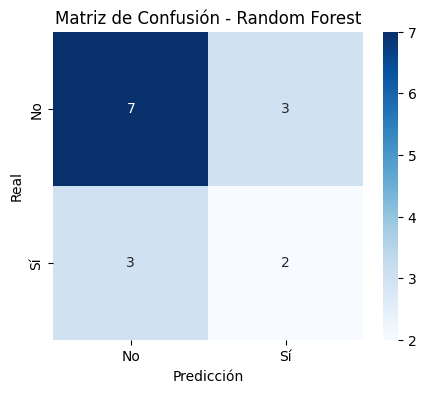

Modelo: SVM
Accuracy: 0.5333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15

Matriz de Confusi√≥n para SVM:
 [[6 4]
 [3 2]]


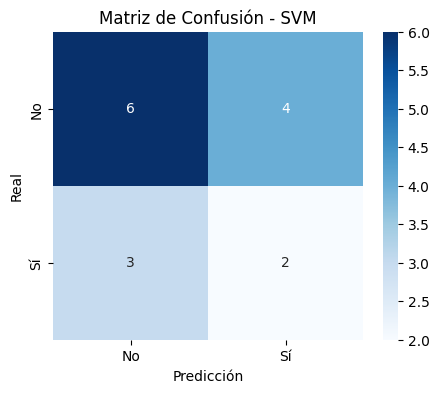

Modelo: XGBoost
Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.50      0.60      0.55         5

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15

Matriz de Confusi√≥n para XGBoost:
 [[7 3]
 [2 3]]


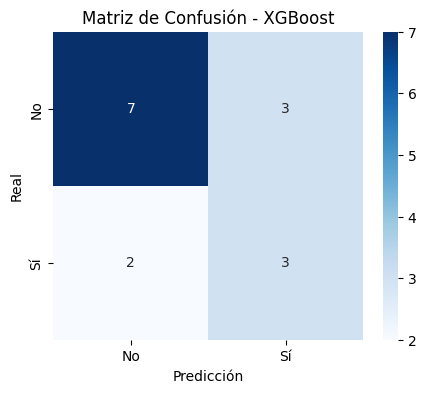

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluaci√≥n de modelos ML
models = {'Random Forest': rf, 'SVM': svm, 'XGBoost': xgb}
for name, model in models.items():
    # Predicci√≥n de las clases
    y_pred = model.predict(X_test_scaled if name == 'SVM' else X_test)

    # Calcular y mostrar el accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name}")
    print(f"Accuracy: {accuracy:.4f}")

    # Imprimir el classification report
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Calcular y mostrar la matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de Confusi√≥n para {name}:\n", cm)

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusi√≥n - {name}")
    plt.show()

Evaluaci√≥n con datos aumentados por ruido aleatorio:
üîπ Accuracy en entrenamiento: 0.8136
üîπ Accuracy en test: 0.5333

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.67      0.60      0.63        10
         1.0       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15



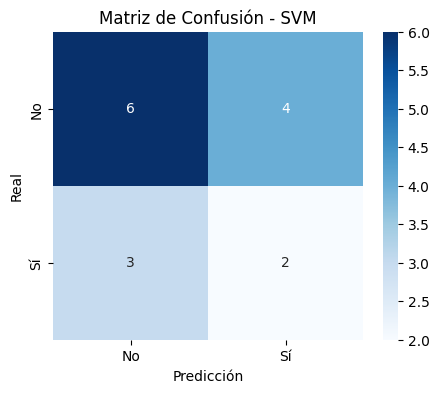

Evaluaci√≥n con datos aumentados por escalado:
üîπ Accuracy en entrenamiento: 0.8136
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



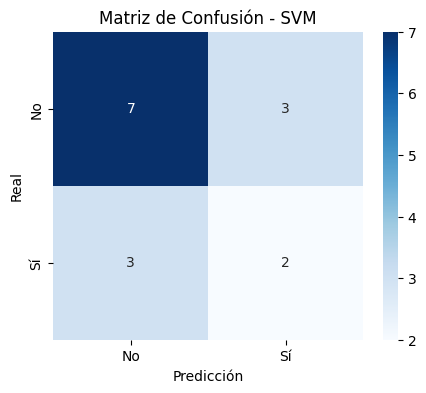

Evaluaci√≥n con datos aumentados por SMOTE:
üîπ Accuracy en entrenamiento: 0.8281
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



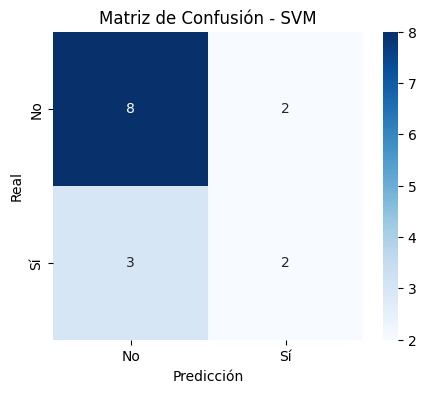

Evaluaci√≥n con datos aumentados por Bootstrap:
üîπ Accuracy en entrenamiento: 0.8136
üîπ Accuracy en test: 0.7333

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        10
         1.0       0.67      0.40      0.50         5

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15



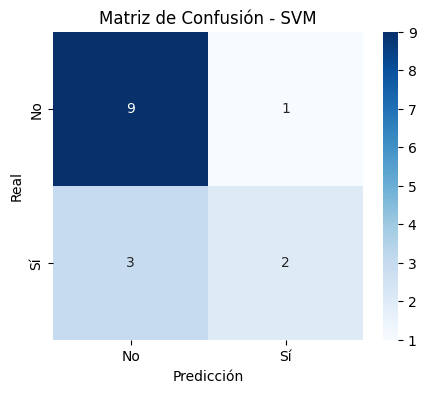

In [ ]:
# Importar librer√≠as necesarias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Funci√≥n para entrenar y evaluar el modelo SVM
def train_and_evaluate_svm(X_train, X_test, y_train, y_test):
    # Crear el modelo SVM con los hiperpar√°metros especificados
    svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True, random_state=42)

    # Entrenar el modelo
    svm.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)

    # Calcular accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Matriz de confusi√≥n
    matriz_conf = confusion_matrix(y_test, y_pred_test)

    # Mostrar resultados
    print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"üîπ Accuracy en test: {acc_test:.4f}")

    # Reporte de clasificaci√≥n
    print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - SVM")
    plt.show()

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise
print("Evaluaci√≥n con datos aumentados por ruido aleatorio:")
train_and_evaluate_svm(X_train_augmented_noise, X_test_scaled, y_train, y_test)

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors
print("Evaluaci√≥n con datos aumentados por escalado:")
train_and_evaluate_svm(X_train_augmented_scaled, X_test_scaled, y_train, y_test)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)
print("Evaluaci√≥n con datos aumentados por SMOTE:")
train_and_evaluate_svm(X_train_augmented_smote, X_test_scaled, y_train_augmented_smote, y_test)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)
print("Evaluaci√≥n con datos aumentados por Bootstrap:")
train_and_evaluate_svm(X_train_augmented_bootstrap, X_test_scaled, y_train_augmented_bootstrap, y_test)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Rango de valores para b√∫squeda
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1.0, 1.5, 2.0],
}
xgb.fit(X_train, y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Modelo: XGBoost
Accuracy: 0.5333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.50      0.59        10
         1.0       0.38      0.60      0.46         5

    accuracy                           0.53        15
   macro avg       0.54      0.55      0.52        15
weighted avg       0.60      0.53      0.55        15

Matriz de Confusi√≥n para XGBoost:
 [[5 5]
 [2 3]]


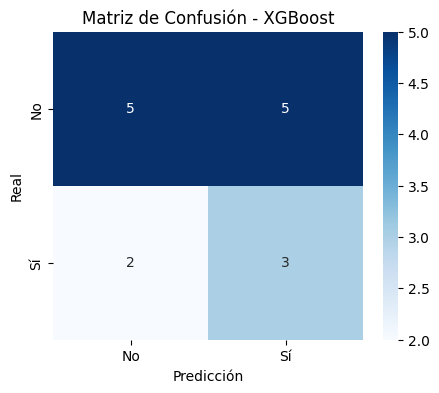

In [ ]:
# Evaluaci√≥n solo para el modelo XGBoost
y_pred_xgb = xgb.predict(X_test)

# Calcular y mostrar el accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Modelo: XGBoost")
print(f"Accuracy: {accuracy:.4f}")

# Imprimir el classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

# Calcular y mostrar la matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred_xgb)
print(f"Matriz de Confusi√≥n para XGBoost:\n", cm)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - XGBoost")
plt.show()

Modelo: XGBoost
Accuracy: 0.6000
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        10
         1.0       0.43      0.60      0.50         5

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15

Matriz de Confusi√≥n para XGBoost:
 [[6 4]
 [2 3]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


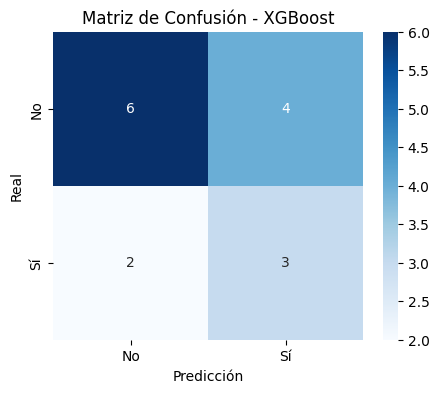

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier( n_estimators=10,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)
xgb.fit(X_train, y_train)

# Evaluaci√≥n de XGBoost
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Modelo: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Matriz de Confusi√≥n para XGBoost:\n", cm_xgb)

# Graficar la matriz de confusi√≥n
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - XGBoost")
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Modelo con configuraci√≥n simple y conservadora
xgb = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=2,
    subsample=1.0,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Entrenamiento
xgb.fit(X_train, y_train)

# Predicci√≥n sobre el conjunto de test
y_pred = xgb.predict(X_test)

# C√°lculo de accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.3f}")


Accuracy del modelo: 0.600


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:06:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Definir early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Modelo 1: Red Neuronal Densa (MLP)
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # El dropout se usa para caso de overfitting para que la neurona no coja esa info o "no la vea" y no se ajuste el modelo tanto a los datos
    Dropout(0.2),
    # La activaci√≥n de relu es por la estructura de clasificaci√≥n y adem√°s en la operaci√≥n en caso de que sea negativo de que el resultado sea negativo, los convierte a 0
    # Hablamos de la operaci√≥n de activaci√≥n
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
#Optimizadora Adam, hace uqe el peso de las neuronas se vaya modificando para disminuir el loss
#Optimizador con otro realmente no cambia mucho pero me decanto por el Adam que es el m√°s usado
#Loss diferencia entre lo real y lo q ue el ha dicho
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Entrenar MLP
model_mlp.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 39ms/step - accuracy: 0.4446 - loss: 0.7233 - val_accuracy: 0.6000 - val_loss: 0.6678
Epoch 2/50
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - accuracy: 0.5185 - loss: 0.6984 - val_accuracy: 0.6000 - val_loss: 0.6721
Epoch 3/50
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.5445 - loss: 0.6989 - val_accuracy: 0.5333 - val_loss: 0.6785
Epoch 4/50
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - accuracy: 0.5785 - loss: 0.6865 - val_accuracy: 0.4667 - val_loss: 0.6803
Epoch 5/50
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step - accuracy: 0.7124 - loss: 0.6543 - val_accuracy: 0.4667 - val_loss: 0.6775
Epoch 6/50
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step - accuracy: 0.7515 - loss: 0.6335 - val_accuracy: 0.5333 - val_loss: 0.6735
Epoch 7/50

In [ ]:
# Modelo 2: Red Neuronal Profunda (DNN)
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar DNN
model_dnn.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 94ms/step - accuracy: 0.4850 - loss: 0.7046 - val_accuracy: 0.6667 - val_loss: 0.6660
Epoch 2/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.5518 - loss: 0.6896 - val_accuracy: 0.6000 - val_loss: 0.6744
Epoch 3/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.7359 - loss: 0.6445 - val_accuracy: 0.6000 - val_loss: 0.6771
Epoch 4/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.8003 - loss: 0.6522 - val_accuracy: 0.5333 - val_loss: 0.6909
Epoch 5/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - accuracy: 0.6337 - loss: 0.6529 - val_accuracy: 0.4667 - val_loss: 0.6950
Epoch 6/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step - accuracy: 0.7267 - loss: 0.6314 - val_accuracy: 0.5333 - val_loss: 0.7011
Epoch 7/100
8/8 

In [ ]:
# Evaluaci√≥n de modelos DL
mlp_loss, mlp_acc = model_mlp.evaluate(X_test_scaled, y_test)
dnn_loss, dnn_acc = model_dnn.evaluate(X_test_scaled, y_test)

print(f"MLP Accuracy: {mlp_acc:.4f}")
print(f"DNN Accuracy: {dnn_acc:.4f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step - accuracy: 0.6000 - loss: 0.6678
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 63ms/step - accuracy: 0.6667 - loss: 0.6660
MLP Accuracy: 0.6000
DNN Accuracy: 0.6667


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 72ms/step
üîπ Modelo: Red Neuronal 1 (DL)
‚úÖ Accuracy: 0.6000
‚úÖ F1-Score: 0.5000

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        10
         1.0       0.43      0.60      0.50         5

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15



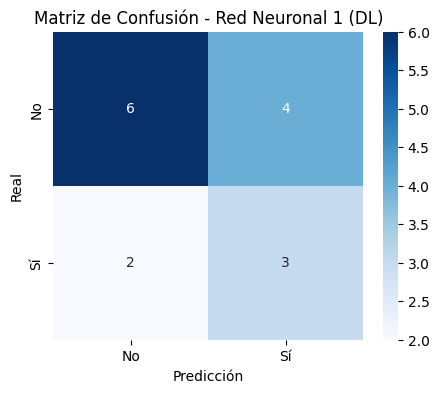

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 78ms/step
üîπ Modelo: Red Neuronal 2 (DL)
‚úÖ Accuracy: 0.6667
‚úÖ F1-Score: 0.4444

üîπ Clasificaci√≥n detallada:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



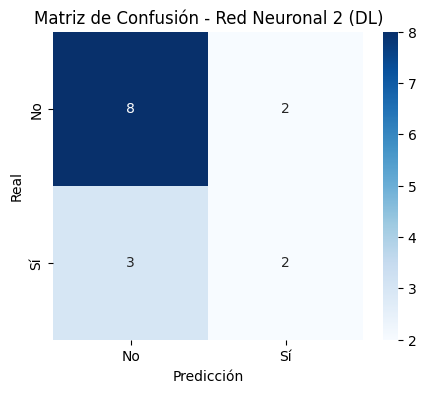

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Funci√≥n para evaluar modelos
def evaluar_modelo(nombre, modelo, X_test, y_test):
    # Obtener las predicciones
    if hasattr(modelo, 'predict_proba'):  # Modelos que devuelven probabilidades (e.g. RandomForest, SVM, XGBoost)
        y_pred_prob = modelo.predict_proba(X_test)[:, 1]  # Extraemos las probabilidades de la clase positiva
        y_pred = (y_pred_prob > 0.5).astype(int)  # Convertimos las probabilidades a clases binarias
    else:  # Modelos que devuelven clases directamente (e.g. MLP, DNN)
        y_pred = modelo.predict(X_test)
        if y_pred.ndim > 1:  # Si el modelo devuelve un array 2D, extraemos la clase
            y_pred = (y_pred[:, 0] > 0.5).astype(int)

    # Calcular las m√©tricas de evaluaci√≥n
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matriz_conf = confusion_matrix(y_test, y_pred)

    # Mostrar resultados
    print(f"üîπ Modelo: {nombre}")
    print(f"‚úÖ Accuracy: {acc:.4f}")
    print(f"‚úÖ F1-Score: {f1:.4f}")
    print("\nüîπ Clasificaci√≥n detallada:\n", classification_report(y_test, y_pred))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusi√≥n - {nombre}")
    plt.show()

# Evaluar todos los modelos
modelos = {
    "Red Neuronal 1 (DL)": model_mlp,
    "Red Neuronal 2 (DL)": model_dnn,
}

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    evaluar_modelo(nombre, modelo, X_test_scaled, y_test)


üîπ Accuracy en entrenamiento: 0.6949
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



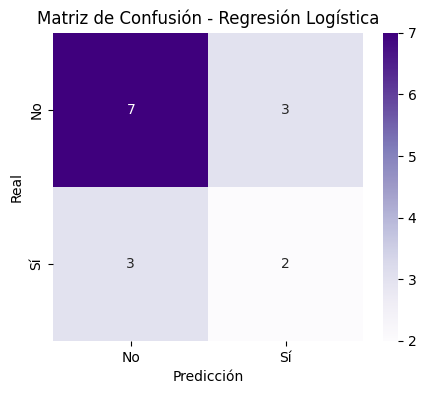

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# üìå Entrenar modelo de Regresi√≥n Log√≠stica
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# üìå Predicciones
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

# üìå Accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
print(f"üîπ Accuracy en test: {acc_test:.4f}")

# üìå Reporte de clasificaci√≥n (solo en test)
print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

# üìå Matriz de confusi√≥n
matriz_conf = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.show()



Evaluaci√≥n con datos aumentados por ruido aleatorio:
üîπ Accuracy en entrenamiento: 0.6610
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.50      0.60      0.55         5

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15



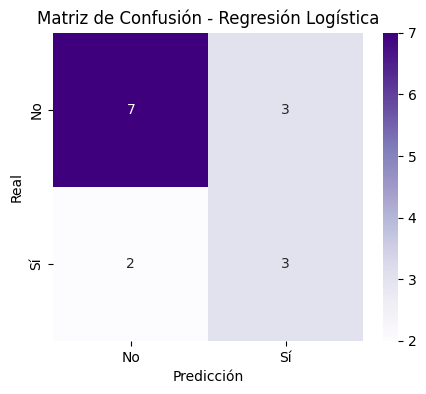

Evaluaci√≥n con datos aumentados por escalado:
üîπ Accuracy en entrenamiento: 0.7119
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.40      0.40      0.40         5

    accuracy                           0.60        15
   macro avg       0.55      0.55      0.55        15
weighted avg       0.60      0.60      0.60        15



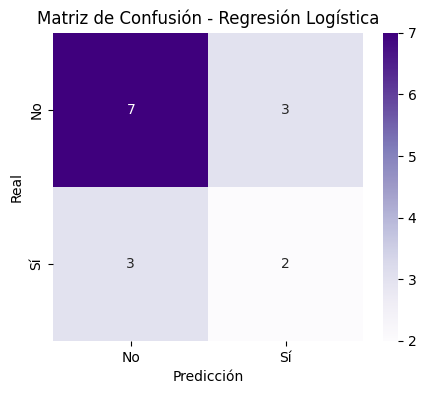

Evaluaci√≥n con datos aumentados por SMOTE:
üîπ Accuracy en entrenamiento: 0.7188
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



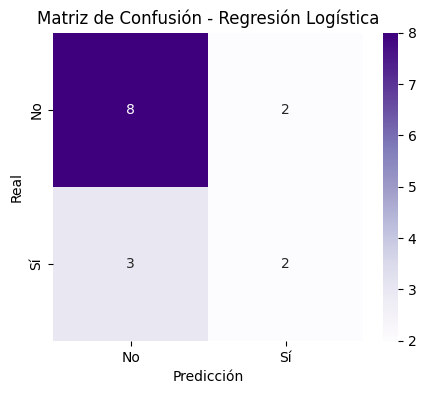

Evaluaci√≥n con datos aumentados por Bootstrap:
üîπ Accuracy en entrenamiento: 0.7119
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.73      0.80      0.76        10
         1.0       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



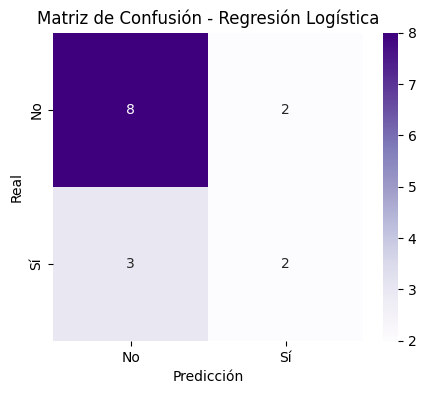

In [ ]:
# Importar librer√≠as necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Funci√≥n para entrenar y evaluar el modelo de Regresi√≥n Log√≠stica
def train_and_evaluate_logreg(X_train, X_test, y_train, y_test):
    # Crear el modelo de Regresi√≥n Log√≠stica
    logreg = LogisticRegression(random_state=42, max_iter=1000)

    # Entrenar el modelo
    logreg.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)

    # Calcular accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Matriz de confusi√≥n
    matriz_conf = confusion_matrix(y_test, y_pred_test)

    # Mostrar resultados
    print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"üîπ Accuracy en test: {acc_test:.4f}")

    # Reporte de clasificaci√≥n
    print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
    plt.show()

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise
print("Evaluaci√≥n con datos aumentados por ruido aleatorio:")
train_and_evaluate_logreg(X_train_augmented_noise, X_test_scaled, y_train, y_test)

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors
print("Evaluaci√≥n con datos aumentados por escalado:")
train_and_evaluate_logreg(X_train_augmented_scaled, X_test_scaled, y_train, y_test)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)
print("Evaluaci√≥n con datos aumentados por SMOTE:")
train_and_evaluate_logreg(X_train_augmented_smote, X_test_scaled, y_train_augmented_smote, y_test)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)
print("Evaluaci√≥n con datos aumentados por Bootstrap:")
train_and_evaluate_logreg(X_train_augmented_bootstrap, X_test_scaled, y_train_augmented_bootstrap, y_test)


üîπ Accuracy en entrenamiento: 0.6610
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.32      0.45      0.38        15
weighted avg       0.43      0.60      0.50        15



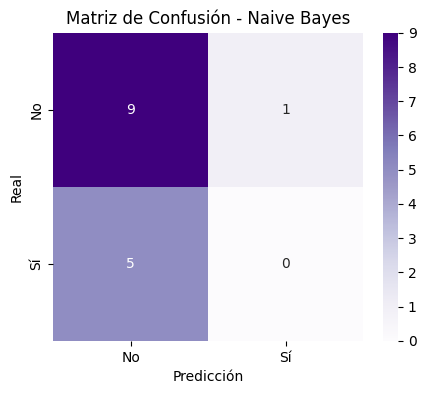

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# üìå Entrenar modelo de Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# üìå Predicciones
y_pred_train = nb.predict(X_train_scaled)
y_pred_test = nb.predict(X_test_scaled)

# üìå Accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
print(f"üîπ Accuracy en test: {acc_test:.4f}")

# üìå Reporte de clasificaci√≥n (solo en test)
print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

# üìå Matriz de confusi√≥n
matriz_conf = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Naive Bayes")
plt.show()


Evaluaci√≥n con datos aumentados por ruido aleatorio:
üîπ Accuracy en entrenamiento: 0.6441
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        10
         1.0       0.00      0.00      0.00         5

    accuracy                           0.67        15
   macro avg       0.33      0.50      0.40        15
weighted avg       0.44      0.67      0.53        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


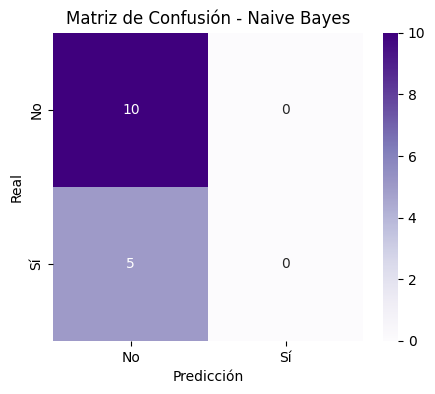

Evaluaci√≥n con datos aumentados por escalado:
üîπ Accuracy en entrenamiento: 0.6610
üîπ Accuracy en test: 0.6000

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.32      0.45      0.38        15
weighted avg       0.43      0.60      0.50        15



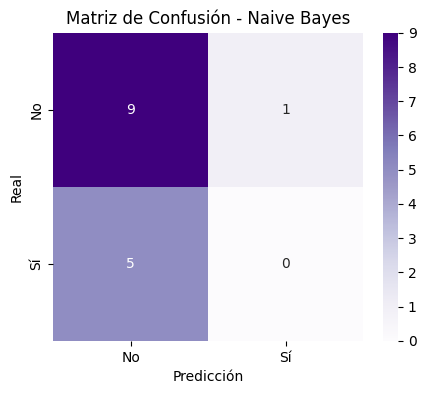

Evaluaci√≥n con datos aumentados por SMOTE:
üîπ Accuracy en entrenamiento: 0.6719
üîπ Accuracy en test: 0.6667

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        10
         1.0       0.50      0.20      0.29         5

    accuracy                           0.67        15
   macro avg       0.60      0.55      0.53        15
weighted avg       0.63      0.67      0.62        15



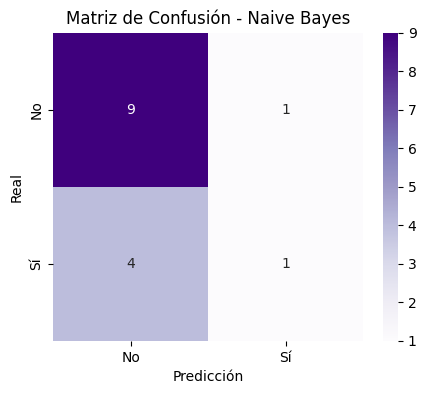

Evaluaci√≥n con datos aumentados por Bootstrap:
üîπ Accuracy en entrenamiento: 0.6610
üîπ Accuracy en test: 0.7333

üîπ Reporte de clasificaci√≥n en test:
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83        10
         1.0       1.00      0.20      0.33         5

    accuracy                           0.73        15
   macro avg       0.86      0.60      0.58        15
weighted avg       0.81      0.73      0.67        15



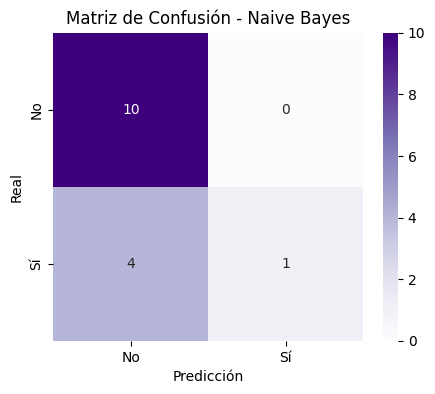

In [ ]:
# Importar librer√≠as necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos (solo para modelos que lo necesitan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Funci√≥n para entrenar y evaluar el modelo de Naive Bayes
def train_and_evaluate_nb(X_train, X_test, y_train, y_test):
    # Crear el modelo de Naive Bayes
    nb = GaussianNB(var_smoothing =1e-06)

    # Entrenar el modelo
    nb.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = nb.predict(X_train)
    y_pred_test = nb.predict(X_test)

    # Calcular accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Matriz de confusi√≥n
    matriz_conf = confusion_matrix(y_test, y_pred_test)

    # Mostrar resultados
    print(f"üîπ Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"üîπ Accuracy en test: {acc_test:.4f}")

    # Reporte de clasificaci√≥n
    print("\nüîπ Reporte de clasificaci√≥n en test:\n", classification_report(y_test, y_pred_test))

    # Graficar la matriz de confusi√≥n
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")
    plt.title("Matriz de Confusi√≥n - Naive Bayes")
    plt.show()

# 1. **Perturbaci√≥n Aleatoria (Random Noise)**
# Agregar ruido aleatorio a las caracter√≠sticas de entrenamiento
noise = np.random.normal(0, 0.1, X_train_scaled.shape)  # Ruido con media 0 y desviaci√≥n est√°ndar 0.1
X_train_augmented_noise = X_train_scaled + noise
print("Evaluaci√≥n con datos aumentados por ruido aleatorio:")
train_and_evaluate_nb(X_train_augmented_noise, X_test_scaled, y_train, y_test)

# 2. **Escalado (Scaling)**
# Aplicar un factor de escala aleatorio entre 0.9 y 1.1 a las caracter√≠sticas de entrenamiento
scaling_factors = np.random.uniform(0.9, 1.1, X_train_scaled.shape[1])  # Factores de escala aleatorios
X_train_augmented_scaled = X_train_scaled * scaling_factors
print("Evaluaci√≥n con datos aumentados por escalado:")
train_and_evaluate_nb(X_train_augmented_scaled, X_test_scaled, y_train, y_test)

# 3. **SMOTE (Synthetic Minority Over-sampling Technique)**
# Aumentar los datos de la clase minoritaria con SMOTE
smote = SMOTE(random_state=42)
X_train_augmented_smote, y_train_augmented_smote = smote.fit_resample(X_train_scaled, y_train)
print("Evaluaci√≥n con datos aumentados por SMOTE:")
train_and_evaluate_nb(X_train_augmented_smote, X_test_scaled, y_train_augmented_smote, y_test)

# 4. **Bootstrap Resampling**
# Realizar re-muestreo con reemplazo de las muestras de entrenamiento (Bootstrap)
X_train_augmented_bootstrap, y_train_augmented_bootstrap = resample(X_train_scaled, y_train, random_state=42)
print("Evaluaci√≥n con datos aumentados por Bootstrap:")
train_and_evaluate_nb(X_train_augmented_bootstrap, X_test_scaled, y_train_augmented_bootstrap, y_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores hiperpar√°metros encontrados: {'var_smoothing': 1e-06}
Accuracy en el conjunto de test: 0.6000

Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        10
         1.0       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.32      0.45      0.38        15
weighted avg       0.43      0.60      0.50        15



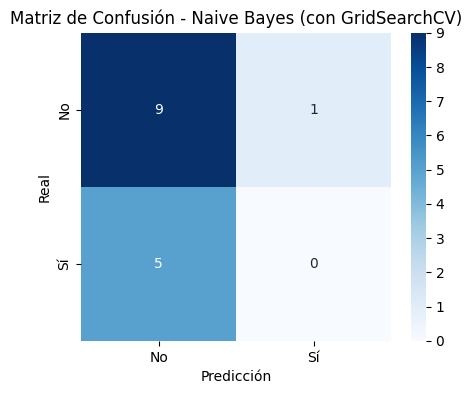

In [ ]:
# Importar librer√≠as necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir caracter√≠sticas (X) y variable objetivo (y)
X = data_modelo2.drop(columns=['degenera'])  # Eliminar la columna objetivo
y = data_modelo2['degenera']  # Variable objetivo

# Dividir en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador de Naive Bayes
nb = GaussianNB()

# Definir el espacio de b√∫squeda de hiperpar√°metros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Este es el √∫nico hiperpar√°metro que se puede ajustar en GaussianNB
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperpar√°metros encontrados
print("Mejores hiperpar√°metros encontrados:", grid_search.best_params_)

# Mejor modelo
best_nb = grid_search.best_estimator_

# Evaluaci√≥n del mejor modelo en el conjunto de test
y_pred = best_nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de test: {accuracy:.4f}")

# Reporte de clasificaci√≥n
print("\nReporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "S√≠"], yticklabels=["No", "S√≠"])
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n - Naive Bayes (con GridSearchCV)")
plt.show()


In [ ]:
import joblib

# Guardar el modelo Random Forest con joblib
joblib.dump(rf, 'modelo_random_forest.pkl')

# Para cargar el modelo en otra parte
rf_cargado = joblib.load('modelo_random_forest.pkl')


In [ ]:
# Guardar el modelo en un archivo .joblib
joblib.dump(rf, 'modelo_random_forest.joblib')

# Para cargar el modelo m√°s tarde
rf_cargado = joblib.load('modelo_random_forest.joblib')

In [ ]:
# Guardar el modelo de XGBoost en formato joblib
joblib.dump(xgb, 'modelo_xgboost.joblib')

# Para cargar el modelo m√°s tarde
xgb_cargado = joblib.load('modelo_xgboost.joblib')